In [22]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import glob
import pickle as pkl
import numpy as np
import scipy as sp
import pandas as pd
from collections import Counter
from networkx import number_of_nodes, adjacency_matrix
from node_attributes import node_features

class_dirnames = glob.glob('*')

graph_sizes = {'Benign': [], 'Bagle': [], 'Bifrose': []}
total = 0
output_dir = 'AllACFGs/'
CFG_labels = ['Benign' , 'Bagle', 'Bifrose']

In [23]:
"""Path name format: class/graph_id/pkl_name"""
for class_dirname in class_dirnames:
    if class_dirname not in CFG_labels:
        continue
    
    print("Processing %s CFGs" % class_dirname)
    data_dirnames = glob.glob(class_dirname + '/*')
    for data_dirname in data_dirnames:
        pkl_filenames = glob.glob(data_dirname + '/*')
        if len(pkl_filenames) == 0:
            print('[Warning] %s is empty' % data_dirname)
        else:
            # Assume only 1 file under data dir
            total += 1
            G = pkl.load(open(pkl_filenames[0], 'rb'))
            graph_sizes[class_dirname].append(number_of_nodes(G))
            
            graph_id = pkl_filenames[0].split('/')[1]
            label = class_dirname
            features = node_features(G)
            np.savetxt(output_dir + graph_id + '.features.txt', features, fmt="%d")
            np.savetxt(output_dir + graph_id + '.label.txt', np.array([label]), fmt="%s")
            # np.savetxt(output_dir + graph_id + '.adjacent.txt', adjacency_matrix(G).todense(), fmt="%d")
            sp.sparse.save_npz(output_dir + graph_id + '.adjacent', adjacency_matrix(G))


print("%d CFGs" % total)
graph_size_pd = pd.DataFrame.from_dict(graph_sizes, orient='index').T
graph_size_pd.to_csv(output_dir + 'graph_sizes.csv', index=False, header=True)

Processing Bagle CFGs
Processing Bifrose CFGs
[Warning] Bifrose/68577f95d878fb0d3cb1ccb311bcd375 is empty
Processing Benign CFGs
[Warning] Benign/ef11db385af16b633efbd524907baa58 is empty
1689 CFGs


In [24]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

data = pd.read_csv(output_dir + 'graph_sizes.csv', header=0)
max_num_nodes = data.max()
label_cnts = {key: data[key].count() for key in CFG_labels}
print(label_cnts)

{'Benign': 518, 'Bagle': 152, 'Bifrose': 1019}


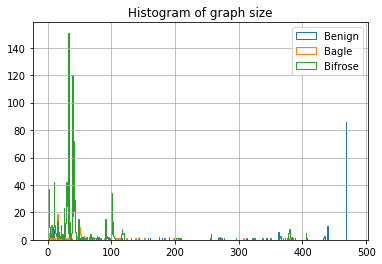

In [26]:
def plot_hist_in_range(data, left=1, right=200):
    for column in data:
        df = data[column].dropna()
        max_num_nodes = df.max()
        plt.hist(df, bins=np.arange(left, right, 1), density=False,
                 histtype='step', label=column)

    plt.legend()
    plt.title('Histogram of graph size')
    plt.grid(True)
    plt.show()
    

plot_hist_in_range(data, right=480)